In [1]:
import os
import shutil


from keras.models import *
from keras.layers import *
from keras.applications import *
from keras.preprocessing.image import *
import numpy as np
from sklearn.utils import shuffle
np.random.seed(1)
from keras import backend as K

import h5py
import sys

from PIL import Image
sys.modules['Image'] = Image

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [37]:
# preprocessing, move files to current project folder use soft link to faster and reduce space usage

keras_download_train = '/home/ubuntu/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/train'
keras_download_test = '/home/ubuntu/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/test'
train_filenames_list = os.listdir(keras_download_train)

train_cat = list(filter(lambda x:x[:3] == 'cat', train_filenames_list))
train_dog = list(filter(lambda x:x[:3] == 'dog', train_filenames_list))


def check_make_dir(*dirs):
    print("example input ('folder1','folder2')")
    for count,dirname in enumerate(dirs):
        if os.path.exists(dirname) and os.path.isdir(dirname):
            shutil.rmtree(dirname)
        os.mkdir(dirname)
        
check_make_dir('train2','train2/cat','train2/dog','test2')

check_make_dir('train','train/cat','train/dog','test','validation','validation/cat','validation/dog')
        
check_make_dir('train3','train3/cat','train3/dog')
    
os.symlink(keras_download_test, 'test2/test')

for filename in train_cat:
    os.symlink(keras_download_train+'/'+filename, 'train2/cat/'+filename)

for filename in train_dog:
    os.symlink(keras_download_train+'/'+filename, 'train2/dog/'+filename)
    
    
os.symlink(keras_download_test, 'train3/test')

for filename in train_cat:
    os.symlink(keras_download_train+'/'+filename, 'train3/cat/'+filename)

for filename in train_dog:
    os.symlink(keras_download_train+'/'+filename, 'train3/dog/'+filename)
    
    

os.symlink(keras_download_test, 'test/test')

for filename in train_cat[:10000]:
    os.symlink(keras_download_train+'/'+filename, 'train/cat/'+filename)

for filename in train_dog[:10000]:
    os.symlink(keras_download_train+'/'+filename, 'train/dog/'+filename)
    
for filename in train_cat[10000:]:
    os.symlink(keras_download_train+'/'+filename, 'validation/cat/'+filename)

for filename in train_dog[10000:]:
    os.symlink(keras_download_train+'/'+filename, 'validation/dog/'+filename)
    

example input ('folder1','folder2')
example input ('folder1','folder2')
example input ('folder1','folder2')


In [27]:
check_make_dir('train3')

NameError: name 'check_make_dir' is not defined

In [3]:
def get_input_shape(img_width, img_height):
    if K.image_data_format() == 'channels_first':
        input_shape = (3,img_width,img_height)
    else:
        input_shape = (img_width,img_height,3)
    return input_shape


In [2]:
# prepare image tensor

image_gen = ImageDataGenerator(featurewise_center=True,fill_mode='constant', 
                               cval=0, horizontal_flip=True, rotation_range=20, shear_range=0.2)

train_gen = image_gen.flow_from_directory("train2", (299, 299), shuffle=False, 
                                    batch_size=32, class_mode=None)

test_gen = image_gen.flow_from_directory("test2", (299, 299), shuffle=False, 
                                         batch_size=32, class_mode=None)

train_filenames = train_gen.filenames
train_nb_samples = len(train_filenames)

test_filenames = test_gen.filenames
test_nb_samples = len(test_filenames)


# define professor X
x = Input((299, 299, 3))
x = InceptionResNetV2(input_tensor=x, weights='imagenet', include_top=False, pooling = 'avg')


train = x.predict_generator(train_gen, steps=train_nb_samples, 
                                            verbose=1)

test = x.predict_generator(test_gen, steps=test_nb_samples, 
                                           verbose=1)
    

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras_preprocessing/image.py:959: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


12500/12500 [==============================] - 10371s 830ms/step


In [5]:
with h5py.File("gap_{0}.h5".format('InceptionResNetV2')) as h:
    h.create_dataset("train", data=train)
    h.create_dataset("test", data=test)
    h.create_dataset("label", data=train_gen.classes)
        

The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.


OSError: Can't prepare for writing data (file write failed: time = Thu Aug  2 10:03:41 2018
, filename = 'gap_InceptionResNetV2.h5', file descriptor = 63, errno = 28, error message = 'No space left on device', buf = 0x7ff4c6973fb0, total write size = 1868353632, bytes this sub-write = 1868353632, bytes actually written = 18446744073709551615, offset = 10408222720)

In [28]:
ls -ltrh

total 9.7G
-rw-rw-r-- 1 ubuntu ubuntu  19K Aug  1 23:58 Untitled.ipynb
-rw-rw-r-- 1 ubuntu ubuntu    6 Aug  1 23:58 README.md
-rw-rw-r-- 1 ubuntu ubuntu  91K Aug  1 23:58 model.h5_save
drwxrwxr-x 2 ubuntu ubuntu 4.0K Aug  1 23:58 uda/
-rw-rw-r-- 1 ubuntu ubuntu 112K Aug  1 23:58 sample_submission.csv
-rw-rw-r-- 1 ubuntu ubuntu 307K Aug  1 23:58 pred.csv
drwxrwxr-x 4 ubuntu ubuntu 4.0K Aug  2 00:00 train2/
drwxrwxr-x 2 ubuntu ubuntu 4.0K Aug  2 00:00 test2/
-rw-rw-r-- 1 ubuntu ubuntu  14K Aug  2 09:52 graduation_project.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 9.7G Aug  2 10:03 gap_InceptionResNetV2.h5


In [32]:
rm -rf /home/ubuntu/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/*.zip

In [29]:
ls -ltrh /home/ubuntu/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/*.zip

-rw-rw-r-- 1 ubuntu ubuntu 272M Aug  1 23:47 /home/ubuntu/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/test.zip
-rw-rw-r-- 1 ubuntu ubuntu 544M Aug  1 23:47 /home/ubuntu/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/train.zip


In [31]:
ls -ltrh /home/ubuntu/

total 1.1G
-rw-rw-r--  1 ubuntu ubuntu 294M May 25  2017 gap_Xception.h5
-rw-rw-r--  1 ubuntu ubuntu  74M May 25  2017 gap_VGG19.h5
-rw-rw-r--  1 ubuntu ubuntu  74M May 25  2017 gap_VGG16.h5
-rw-rw-r--  1 ubuntu ubuntu 294M May 25  2017 gap_ResNet50.h5
-rw-rw-r--  1 ubuntu ubuntu 294M May 25  2017 gap_InceptionV3.h5
-rw-rw-r--  1 ubuntu ubuntu 2.8M Jul 18 02:00 Nvidia_Cloud_EULA.pdf
drwxrwxr-x  5 ubuntu ubuntu 4.0K Jul 19 18:10 tutorials/
drwxrwxr-x  8 ubuntu ubuntu 4.0K Jul 19 18:10 examples/
-rw-rw-r--  1 ubuntu ubuntu 2.8K Jul 19 18:11 README
drwxrwxr-x 24 ubuntu ubuntu 4.0K Jul 19 19:15 anaconda3/
drwxrwxr-x 10 ubuntu ubuntu 4.0K Jul 19 19:59 src/
-rw-rw-r--  1 ubuntu ubuntu 112K Aug  1 23:46 sample_submission.csv
drwxrwxr-x  7 ubuntu ubuntu 4.0K Aug  2 10:07 uda/


In [ ]:

def write_gap(MODEL, image_size, lambda_func=None):
    width = image_size[0]
    height = image_size[1]
    x = Input((height, width, 3))
    if lambda_func:
        x = Lambda(lambda_func)(x)

    base_model = MODEL(input_tensor=x, weights='imagenet', include_top=False)
    model = Model(base_model.input, GlobalAveragePooling2D()(base_model.output))

    gen = ImageDataGenerator()
    train_generator = gen.flow_from_directory("train2", image_size, shuffle=False, 
                                              batch_size=16)
    test_generator = gen.flow_from_directory("test2", image_size, shuffle=False, 
                                             batch_size=16, class_mode=None)
    print("stage2")

    #my add starts
    train_filenames = train_generator.filenames
    train_nb_samples = len(train_filenames)

    test_filenames = test_generator.filenames
    test_nb_samples = len(test_filenames)
    
    #my add finish
    
    print("{}".format(MODEL.__name__))
    print("stage3")
    
    train = model.predict_generator(train_generator,steps=train_nb_samples,verbose=1)
    test = model.predict_generator(test_generator,steps=test_nb_samples,verbose=1)
    
    print("stage4")

                                   
    with h5py.File("gap_%s.h5"%MODEL.__name__) as h:
        h.create_dataset("train", data=train)
        h.create_dataset("test", data=test)
        h.create_dataset("label", data=train_generator.classes)
        
write_gap(ResNet50, (224, 224), resnet50.preprocess_input)
        
'''
write_gap(InceptionResNetV2, (299, 299), inception_resnet_v2.preprocess_input)


write_gap(ResNet50, (224, 224), resnet50.preprocess_input)
write_gap(InceptionV3, (299, 299), inception_v3.preprocess_input)
write_gap(Xception, (299, 299), xception.preprocess_input)
'''


Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.
stage2
ResNet50
stage3
  290/25000 [..............................] - ETA: 1:00:45

In [6]:
print("test")

test


In [3]:
K.tensorflow_backend._get_available_gpus()

[]

In [11]:
import tensorflow as tf
import keras
config = tf.ConfigProto( device_count = {'GPU':1,'CPU':4})
sess = tf.Session(config=config)
keras.backend.set_session(sess)

In [13]:
K.tensorflow_backend._get_available_gpus()


[]

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11268157532926125419
]


In [2]:
import tensorflow as tf

if tf.test.gpu_device_name():
    print("{}".format(tf.test.gpu_device_name()))
else:
    print("plz install gpu version")

/device:GPU:0


NameError: name 'input_model' is not defined

In [4]:
from keras.applications.inception_resnet_v2 import preprocess_input

img_width, img_height = 299,299

epochs = 10
batch_size = 16

base_model = Sequential()
base_model.add(Conv2D(32,(3,3), input_shape=get_input_shape(img_width,img_height)))
base_model.add(Activation('relu'))
base_model.add(MaxPooling2D(pool_size=(2,2)))

base_model.add(Conv2D(32,(3,3)))
base_model.add(Activation('relu'))
base_model.add(MaxPooling2D(pool_size=(2,2)))

base_model.add(Conv2D(64,(3,3)))
base_model.add(Activation('relu'))
base_model.add(MaxPooling2D(pool_size=(2,2)))

base_model.add(Flatten())
base_model.add(Dense(64))
base_model.add(Activation('relu'))
base_model.add(Dropout(0.5))
base_model.add(Dense(1))
base_model.add(Activation('sigmoid'))

base_model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

#seems rescale is very important.
#image_gen = ImageDataGenerator(featurewise_center=False,fill_mode='nearest',
#                               cval=0,horizontal_flip=True,rotation_range=20,shear_range=0.2,rescale=1./255)



image_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# validation_split=0.4, cval=0, fill_mode='constant'

train_gen = image_gen.flow_from_directory("train", (img_width,img_height), shuffle=True,
                                    batch_size=16,class_mode='binary')# subset = "training",class_mode="categorical" ,interpolation='bicubic',

validation_gen = image_gen.flow_from_directory("validation", (img_width,img_height), shuffle=True,
                                    batch_size=16, class_mode='binary') # 'binary',,interpolation='bicubic',

test_gen = image_gen.flow_from_directory("test", (img_width,img_height), shuffle=False, 
                                         batch_size=8, class_mode=None)


Found 20000 images belonging to 2 classes.
Found 4992 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [5]:
net = InceptionResNetV2(include_top=False, 
                        weights='imagenet', 
                        input_tensor=None, 
                        input_shape=get_input_shape(299,299)) 
x = net.output 
x = Flatten()(x) 
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x) 
output_layer = Dense(1, activation='sigmoid')(x) 
net_final = Model(inputs=net.input, outputs=output_layer) 


for layer in net_final.layers[:100]: 
    layer.trainable = False 
for layer in net_final.layers[100:]: 
    layer.trainable = True 

net_final.compile(optimizer='rmsprop', 
                  loss='binary_crossentropy', metrics=['accuracy']) 


# train the model 
history=net_final.fit_generator(generator=train_gen,
                    validation_data=validation_gen,epochs=25)

Epoch 1/25
1063/1063 [==============================] - 1740s 2s/step - loss: 0.5810 - acc: 0.8876 - val_loss: 0.4140 - val_acc: 0.8664
Epoch 2/25
1063/1063 [==============================] - 1653s 2s/step - loss: 0.3496 - acc: 0.9324 - val_loss: 0.7277 - val_acc: 0.8818
Epoch 3/25
1063/1063 [==============================] - 1655s 2s/step - loss: 0.2149 - acc: 0.9509 - val_loss: 1.3040 - val_acc: 0.8817
Epoch 4/25
1063/1063 [==============================] - 1651s 2s/step - loss: 0.1203 - acc: 0.9658 - val_loss: 0.1403 - val_acc: 0.9525
Epoch 5/25
1063/1063 [==============================] - 1651s 2s/step - loss: 0.1072 - acc: 0.9702 - val_loss: 0.0882 - val_acc: 0.9707
Epoch 6/25
1063/1063 [==============================] - 1655s 2s/step - loss: 0.2139 - acc: 0.9674 - val_loss: 0.1273 - val_acc: 0.9609
Epoch 7/25
1063/1063 [==============================] - 1651s 2s/step - loss: 0.0933 - acc: 0.9769 - val_loss: 0.1290 - val_acc: 0.9650
Epoch 8/25
1063/1063 [==========================

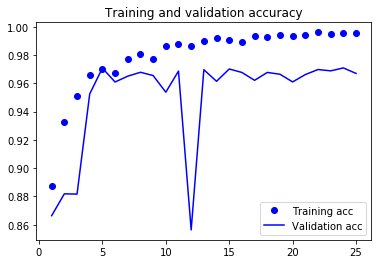

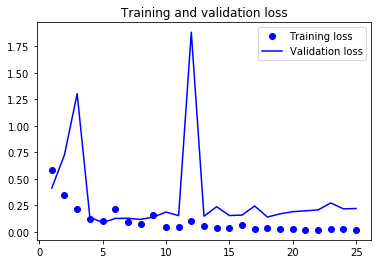

In [7]:
%matplotlib inline  
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [8]:
net_final.save_weights('My_InceptionResNetV2_BETA.h5')

In [21]:
from keras.optimizers import SGD

net = InceptionResNetV2(include_top=False, 
                        weights='imagenet', 
                        input_tensor=None, 
                        input_shape=get_input_shape(299,299)) 
x = net.output 
x = Flatten()(x) 
x = Dense(64, activation='relu')(x)
x = Dropout(0.7)(x) 
output_layer = Dense(1, activation='sigmoid')(x) 
net_final = Model(inputs=net.input, outputs=output_layer) 


for layer in net_final.layers[:100]: 
    layer.trainable = False 
for layer in net_final.layers[100:]: 
    layer.trainable = True 

#my_optimizer = SGD(lr=0.0001, momentum=0.9)
    
net_final.compile(optimizer='adadelta', 
                  loss='binary_crossentropy', metrics=['accuracy']) 


# train the model 
history=net_final.fit_generator(generator=train_gen,
                    validation_data=validation_gen,epochs=30)#shuffle=True

Epoch 1/30
1250/1250 [==============================] - 445s 356ms/step - loss: 0.5806 - acc: 0.8968 - val_loss: 1.2350 - val_acc: 0.8816
Epoch 2/30
1250/1250 [==============================] - 396s 317ms/step - loss: 0.2181 - acc: 0.9577 - val_loss: 0.2044 - val_acc: 0.9553
Epoch 3/30
1250/1250 [==============================] - 395s 316ms/step - loss: 0.5615 - acc: 0.9437 - val_loss: 0.8325 - val_acc: 0.9215
Epoch 4/30
1250/1250 [==============================] - 396s 317ms/step - loss: 0.2527 - acc: 0.9653 - val_loss: 0.1606 - val_acc: 0.9565
Epoch 5/30
1250/1250 [==============================] - 395s 316ms/step - loss: 0.0595 - acc: 0.9827 - val_loss: 0.0825 - val_acc: 0.9744
Epoch 6/30
1250/1250 [==============================] - 393s 314ms/step - loss: 0.0607 - acc: 0.9868 - val_loss: 0.0638 - val_acc: 0.9776
Epoch 7/30
1250/1250 [==============================] - 391s 313ms/step - loss: 0.0322 - acc: 0.9900 - val_loss: 0.0693 - val_acc: 0.9770
Epoch 8/30
1250/1250 [============

In [9]:
net_final.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_7[0][0]                   
__________________________________________________________________________________________________
activation_11 (Activation)      (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_8 (

In [6]:
net_final.save_weights('My_InceptionResNetV2_SIN_V1.h5')

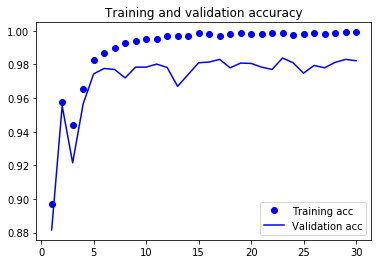

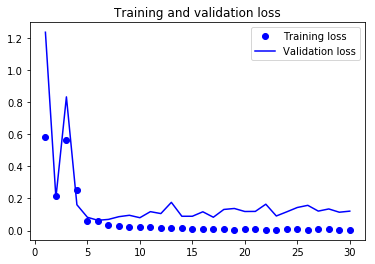

In [23]:
%matplotlib inline  
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
net = InceptionResNetV2(include_top=False, 
                        weights='imagenet', 
                        input_tensor=None, 
                        input_shape=get_input_shape(299,299)) 
x = net.output 
x = Flatten()(x) 
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x) 
output_layer = Dense(1, activation='sigmoid')(x) 
net_final = Model(inputs=net.input, outputs=output_layer) 


for layer in net_final.layers[:300]: 
    layer.trainable = False 
for layer in net_final.layers[300:]: 
    layer.trainable = True 

#my_optimizer=
    
net_final.compile(optimizer='adadelta', 
                  loss='binary_crossentropy', metrics=['accuracy']) 


# train the model 
history=net_final.fit_generator(generator=train_gen,
                    validation_data=validation_gen,epochs=25)

In [7]:
net = InceptionResNetV2(include_top=False, 
                        weights='imagenet', 
                        input_tensor=None, 
                        input_shape=get_input_shape(299,299)) 
x = net.output 
x = Flatten()(x) 
x = Dropout(0.5)(x) 
output_layer = Dense(2, activation='sigmoid')(x) 
net_final = Model(inputs=net.input, outputs=output_layer) 


for layer in net_final.layers[:100]: 
    layer.trainable = False 
for layer in net_final.layers[100:]: 
    layer.trainable = True 

#my_optimizer=
    
net_final.compile(optimizer='rmsprop', 
                  loss='binary_crossentropy', metrics=['accuracy']) 


net_final.load_weights('My_InceptionResNetV2_BETA.h5')

In [8]:
ls -ltr

total 10593496
-rw-rw-r-- 1 ubuntu ubuntu       18950 Aug  1 23:58 Untitled.ipynb
-rw-rw-r-- 1 ubuntu ubuntu           6 Aug  1 23:58 README.md
-rw-rw-r-- 1 ubuntu ubuntu       92952 Aug  1 23:58 model.h5_save
drwxrwxr-x 2 ubuntu ubuntu        4096 Aug  1 23:58 uda/
-rw-rw-r-- 1 ubuntu ubuntu      113903 Aug  1 23:58 sample_submission.csv
-rw-rw-r-- 1 ubuntu ubuntu      313693 Aug  1 23:58 pred.csv
-rw-rw-r-- 1 ubuntu ubuntu 10408222720 Aug  2 10:03 gap_InceptionResNetV2.h5
-rw-rw-r-- 1 ubuntu ubuntu   219796776 Aug  7 23:15 My_InceptionResNetV2_BETA.h5
drwxrwxr-x 4 ubuntu ubuntu        4096 Aug  8 15:12 train2/
drwxrwxr-x 4 ubuntu ubuntu        4096 Aug  8 15:12 train/
drwxrwxr-x 4 ubuntu ubuntu        4096 Aug  8 15:12 validation/
drwxrwxr-x 2 ubuntu ubuntu        4096 Aug  8 15:12 test2/
drwxrwxr-x 2 ubuntu ubuntu        4096 Aug  8 15:12 test/
-rw-rw-r-- 1 ubuntu ubuntu   219005688 Aug  9 16:42 My_InceptionResNetV2_BETA_V2.h5
-rw-rw-r-- 1 ubuntu ubuntu       79000 Aug 10 12:45 grad

In [9]:
cat sample_submission.csv

id,label
1,0.5
2,0.5
3,0.5
4,0.5
5,0.5
6,0.5
7,0.5
8,0.5
9,0.5
10,0.5
11,0.5
12,0.5
13,0.5
14,0.5
15,0.5
16,0.5
17,0.5
18,0.5
19,0.5
20,0.5
21,0.5
22,0.5
23,0.5
24,0.5
25,0.5
26,0.5
27,0.5
28,0.5
29,0.5
30,0.5
31,0.5
32,0.5
33,0.5
34,0.5
35,0.5
36,0.5
37,0.5
38,0.5
39,0.5
40,0.5
41,0.5
42,0.5
43,0.5
44,0.5
45,0.5
46,0.5
47,0.5
48,0.5
49,0.5
50,0.5
51,0.5
52,0.5
53,0.5
54,0.5
55,0.5
56,0.5
57,0.5
58,0.5
59,0.5
60,0.5
61,0.5
62,0.5
63,0.5
64,0.5
65,0.5
66,0.5
67,0.5
68,0.5
69,0.5
70,0.5
71,0.5
72,0.5
73,0.5
74,0.5
75,0.5
76,0.5
77,0.5
78,0.5
79,0.5
80,0.5
81,0.5
82,0.5
83,0.5
84,0.5
85,0.5
86,0.5
87,0.5
88,0.5
89,0.5
90,0.5
91,0.5
92,0.5
93,0.5
94,0.5
95,0.5
96,0.5
97,0.5
98,0.5
99,0.5
100,0.5
101,0.5
102,0.5
103,0.5
104,0.5
105,0.5
106,0.5
107,0.5
108,0.5
109,0.5
110,0.5
111,0.5
112,0.5
113,0.5
114,0.5
115,0.5
116,0.5
117,0.5
118,0.5
119,0.5
120,0.5
121,0.5
122,0.5
123,0.5
124,0.5
125,0.5
126,0.5
127,0.5
128,0.5
129,0.5
130,0.5
131,0.5
132,0.5
133,0.5
134,0.5
135,0.5
136,0.5
137,0.5
138

In [29]:
import pandas as pd

from keras.applications.inception_resnet_v2 import preprocess_input

df = pd.read_csv("sample_submission.csv")


image_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# validation_split=0.4, cval=0, fill_mode='constant'


test_gen = image_gen.flow_from_directory("test/", (299,299), shuffle=False, 
                                         batch_size=8, class_mode='binary')


result = net_final.predict_generator(generator=test_gen, verbose=1)

Found 12500 images belonging to 1 classes.
1563/1563 [==============================] - 420s 269ms/step


In [30]:
print(len(result))

print(result[12499])

12500
[1.00000e+00 1.16926e-17]


In [24]:
import glob

import re

file_list = sorted(glob.glob('test/test/*'),key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])
i=1
a=list()
for file in file_list:
    i += 1
    print(i)
    img = image.load_img(file, target_size=(299, 299)) 
    # 图像预处理 
    x = image.img_to_array(img) 
    x = np.expand_dims(x, axis=0) 
    x = preprocess_input(x) 
    # 对图像进行分类 
    preds = net_final.predict(x)
    print(preds[0][0])
    a.append(preds[0])

print(a)


    
    
    

2
1.0
3
1.0
4
1.0
5
1.0
6
7.265239e-22
7
3.3324723e-26
8
0.0
9
5.220357e-21
10
0.0
11
0.0
12
3.6448108e-30
13
1.0
14
0.0
15
4.1530077e-21
16
0.0
17
7.508521e-12
18
0.9999995
19
1.0
20
0.0
21
0.0
22
1.0
23
5.742317e-17
24
1.0
25
0.99995923
26
0.0
27
1.0
28
1.0
29
9.6766585e-33
30
0.99991965
31
1.0
32
1.0
33
0.006684513
34
1.0
35
8.619568e-20
36
3.598377e-23
37
2.1735386e-21
38
0.0
39
1.5433524e-36
40
0.9999994
41
2.616735e-34
42
1.0
43
1.0
44
1.0
45
1.0
46
0.0
47
0.99999285
48
0.0
49
1.0
50
1.0
51
6.0571773e-28
52
0.0
53
0.0
54
0.0
55
6.6757986e-34
56
0.0
57
1.0
58
1.0
59
7.5753904e-25
60
0.9999981
61
3.1496564e-37
62
5.956065e-27
63
1.0
64
3.2917416e-13
65
0.0
66
1.0
67
1.0
68
1.0
69
0.0
70
1.0
71
1.0
72
1.0
73
1.0
74
1.0
75
1.0
76
0.0
77
1.0
78
1.0
79
1.0
80
1.0
81
0.0
82
9.060581e-12
83
0.0
84
1.0
85
1.6629414e-07
86
1.0
87
0.9998241
88
1.0
89
1.0
90
0.0
91
0.7108686
92
3.194106e-17
93
0.0
94
5.426381e-38
95
1.0
96
1.0
97
2.800204e-25
98
1.0
99
1.0
100
0.0
101
1.1392297e-05
102
0.0
1

1.0
768
1.0
769
1.0
770
1.0
771
1.0
772
5.4695517e-21
773
2.8325644e-07
774
1.0
775
9.414841e-10
776
1.2773467e-23
777
2.284864e-09
778
1.0
779
1.2484299e-28
780
1.0
781
1.0
782
0.9999535
783
3.0280498e-13
784
1.0
785
0.97519195
786
4.8941044e-31
787
1.0
788
0.0
789
0.0
790
1.0
791
1.0
792
1.0
793
1.0
794
1.0
795
0.99991214
796
2.014066e-18
797
0.99999964
798
1.0
799
1.0
800
0.0
801
1.0
802
4.970183e-11
803
0.0
804
0.0
805
0.0
806
0.9999993
807
1.0
808
1.0
809
0.6055454
810
1.0
811
0.97478867
812
6.452071e-18
813
1.0
814
0.8838087
815
1.0
816
1.0
817
1.0
818
0.39527878
819
1.0
820
1.0
821
3.2055737e-21
822
1.0
823
4.382417e-22
824
1.0
825
0.0
826
0.0
827
1.0
828
2.8938772e-34
829
1.0
830
1.0
831
0.0
832
0.0
833
1.0
834
1.0
835
1.0
836
1.0
837
2.7227151e-36
838
1.0
839
0.0
840
1.0
841
2.8708003e-10
842
2.5080085e-26
843
1.0
844
1.5311249e-11
845
1.0
846
1.0
847
1.0
848
0.0
849
1.0
850
2.7625774e-20
851
0.0
852
0.99958426
853
0.0
854
1.0
855
1.0
856
0.0
857
5.316454e-23
858
1.0
859
1.0
8

1.0
1473
4.1260895e-33
1474
0.0
1475
1.8911895e-17
1476
0.0
1477
1.0
1478
1.0
1479
4.5332885e-38
1480
0.9999963
1481
0.0
1482
1.0
1483
0.99999964
1484
1.0
1485
1.4655694e-38
1486
1.16018636e-26
1487
1.0
1488
0.0
1489
0.0
1490
3.0528572e-14
1491
1.0
1492
0.0
1493
0.0
1494
1.0
1495
0.0
1496
1.0
1497
0.99999785
1498
1.0
1499
1.0
1500
6.545068e-11
1501
0.0
1502
1.0
1503
1.8770363e-26
1504
0.0
1505
9.368701e-09
1506
4.693695e-35
1507
1.0
1508
2.7260465e-17
1509
1.0
1510
1.0
1511
0.0
1512
0.00023606085
1513
1.0
1514
0.004105445
1515
1.3344864e-17
1516
5.1895864e-19
1517
1.0
1518
0.0
1519
0.0
1520
0.9999603
1521
9.263791e-13
1522
1.0
1523
1.1724366e-23
1524
3.938336e-22
1525
3.1912488e-29
1526
1.0
1527
1.0
1528
2.4717877e-11
1529
6.746927e-32
1530
1.0
1531
1.0
1532
1.0
1533
0.0
1534
1.3652256e-33
1535
9.075254e-37
1536
0.0
1537
1.0
1538
1.0
1539
1.0
1540
9.9721826e-14
1541
2.763203e-25
1542
1.0
1543
1.0
1544
0.16194968
1545
0.9998056
1546
2.0160202e-05
1547
1.0
1548
1.0
1549
0.0
1550
1.0
1551

0.0
2163
2.5359212e-23
2164
1.0
2165
3.4514738e-20
2166
5.257205e-37
2167
0.0
2168
0.0
2169
3.809813e-18
2170
0.0
2171
0.0
2172
1.0
2173
2.5855873e-12
2174
1.0
2175
1.0
2176
1.0
2177
1.0
2178
1.0
2179
1.0
2180
1.0
2181
0.9999987
2182
0.0016694408
2183
1.0
2184
0.0
2185
1.0
2186
1.0
2187
1.0
2188
0.0
2189
0.0
2190
1.0
2191
0.0
2192
3.7418097e-21
2193
1.0
2194
1.0
2195
1.0
2196
8.215234e-17
2197
1.0
2198
1.0
2199
0.8548787
2200
0.0020661033
2201
0.0
2202
1.0
2203
1.0
2204
9.447359e-30
2205
1.0
2206
2.652464e-33
2207
5.3161083e-31
2208
0.0
2209
0.0
2210
1.0
2211
1.0
2212
1.0
2213
1.0
2214
0.0
2215
1.0
2216
1.0
2217
1.0
2218
1.0
2219
0.0
2220
5.8073744e-15
2221
1.0
2222
1.0
2223
1.0
2224
1.0
2225
2.466728e-16
2226
0.0
2227
1.0
2228
2.6487107e-27
2229
1.0
2230
1.0
2231
0.88827163
2232
0.0
2233
1.0
2234
0.0
2235
0.97893447
2236
0.0
2237
2.4328705e-16
2238
4.5399973e-18
2239
1.0
2240
0.0
2241
1.0
2242
1.0
2243
0.0
2244
1.4420876e-13
2245
1.0
2246
0.0
2247
1.0
2248
0.0
2249
9.140649e-28
2250
0

1.0067177e-29
2853
0.0
2854
0.0
2855
0.0
2856
1.0
2857
1.0
2858
2.2916118e-20
2859
0.0
2860
0.0
2861
0.017384874
2862
1.0
2863
1.0
2864
0.0
2865
1.0
2866
6.2028184e-24
2867
0.0
2868
1.0
2869
1.0
2870
3.8046996e-11
2871
1.0
2872
1.0
2873
0.0
2874
0.0
2875
3.2680213e-23
2876
1.0
2877
1.0
2878
1.0
2879
1.0
2880
1.0
2881
6.065313e-29
2882
1.0
2883
1.0
2884
1.0419153e-24
2885
1.0
2886
1.0
2887
0.0
2888
0.0
2889
1.9688012e-16
2890
1.0
2891
0.0007805423
2892
1.0
2893
1.0
2894
0.0
2895
1.0
2896
1.0
2897
1.590778e-20
2898
5.04334e-23
2899
4.2553344e-07
2900
1.0
2901
1.0
2902
0.0
2903
5.595494e-08
2904
1.5781476e-10
2905
1.0
2906
1.0
2907
0.0
2908
1.0
2909
7.92936e-14
2910
4.1495045e-30
2911
1.0
2912
1.0
2913
1.0
2914
1.0
2915
7.6301893e-14
2916
0.0
2917
1.0
2918
0.0
2919
3.2136939e-12
2920
1.0
2921
0.0
2922
3.1691182e-12
2923
7.713739e-15
2924
1.0
2925
1.0
2926
1.0
2927
1.0
2928
0.9964748
2929
1.0
2930
1.7938052e-11
2931
1.6898412e-24
2932
1.0
2933
1.6851621e-23
2934
0.0
2935
1.0186399e-27
2936

1.4585977e-38
3543
1.0
3544
1.8389111e-36
3545
1.0
3546
0.0
3547
1.0
3548
0.0
3549
0.0
3550
0.0
3551
0.9999989
3552
0.0
3553
1.0
3554
1.5853e-11
3555
1.0
3556
2.0501925e-30
3557
0.0
3558
1.0
3559
1.0
3560
0.0
3561
5.1958038e-20
3562
0.0
3563
1.0
3564
1.0
3565
5.6451074e-15
3566
4.3402776e-36
3567
2.6076836e-14
3568
1.0
3569
1.0
3570
1.0
3571
1.0
3572
1.0
3573
1.0
3574
0.0
3575
1.0
3576
0.0
3577
0.0
3578
3.2825286e-37
3579
0.0
3580
0.00012795096
3581
1.0
3582
0.93349177
3583
1.0
3584
0.0
3585
0.0
3586
1.0
3587
0.0
3588
1.0
3589
1.0
3590
0.0
3591
1.1334063e-25
3592
0.0
3593
1.0
3594
1.0
3595
0.0
3596
1.0
3597
1.0
3598
1.6247784e-36
3599
0.009574735
3600
4.274116e-12
3601
1.0
3602
1.0
3603
4.2717347e-35
3604
1.1237485e-20
3605
2.3301455e-10
3606
0.0
3607
1.0
3608
0.0
3609
1.0
3610
1.0005059e-18
3611
1.0
3612
0.0
3613
0.0
3614
1.0
3615
5.869527e-10
3616
0.06301328
3617
0.0
3618
1.0444146e-16
3619
2.2224105e-21
3620
5.5116598e-05
3621
0.0
3622
1.0
3623
2.9614444e-32
3624
1.0
3625
0.0
3626
0

1.0
4233
5.8291487e-37
4234
1.0
4235
0.0014828919
4236
1.0
4237
0.0
4238
1.0
4239
0.99496764
4240
9.180218e-33
4241
1.0
4242
0.0
4243
1.0
4244
1.0
4245
6.823439e-24
4246
1.0
4247
0.99972063
4248
1.0
4249
1.0
4250
2.4044842e-21
4251
1.2988604e-20
4252
1.0
4253
0.999998
4254
0.0
4255
0.0
4256
1.0
4257
1.8764567e-18
4258
1.0
4259
1.0
4260
1.0
4261
1.0
4262
0.4732341
4263
0.00076622673
4264
6.422298e-29
4265
1.0
4266
1.0
4267
4.4738315e-15
4268
1.0
4269
1.0
4270
9.592534e-25
4271
2.192782e-06
4272
0.0
4273
1.0
4274
0.0
4275
1.0
4276
0.0
4277
0.22528878
4278
5.4266774e-28
4279
0.0
4280
4.6518037e-21
4281
5.273039e-12
4282
0.0
4283
1.0
4284
1.8716497e-36
4285
2.8326237e-21
4286
9.719699e-15
4287
2.387899e-13
4288
1.0
4289
0.0
4290
1.0
4291
1.0
4292
0.0
4293
0.0
4294
3.508613e-33
4295
1.0
4296
1.0
4297
0.0
4298
1.0
4299
0.0
4300
1.0
4301
1.0
4302
9.4815535e-29
4303
0.99997985
4304
1.0
4305
1.0
4306
3.87921e-10
4307
9.199286e-11
4308
1.0
4309
0.0
4310
1.0
4311
0.0
4312
0.9694073
4313
9.735985e

2.994655e-14
4923
0.0
4924
0.0
4925
0.6564441
4926
6.1339e-31
4927
1.0
4928
1.0
4929
0.0
4930
1.0
4931
0.0
4932
1.0
4933
7.5699014e-25
4934
0.0
4935
5.9398576e-22
4936
1.0
4937
0.0
4938
1.0
4939
1.0
4940
1.0
4941
1.0
4942
1.0
4943
1.0
4944
0.0
4945
7.833673e-19
4946
7.883826e-27
4947
1.0
4948
2.2991521e-19
4949
0.0
4950
0.0
4951
1.0
4952
2.535586e-28
4953
1.0
4954
1.0
4955
1.0
4956
1.0
4957
4.8356693e-37
4958
0.0
4959
0.0
4960
0.0002586653
4961
1.0
4962
2.4231136e-12
4963
1.0
4964
1.0
4965
0.0
4966
0.7986359
4967
1.0
4968
1.4991604e-34
4969
0.0
4970
1.0
4971
0.0
4972
1.0
4973
0.0
4974
1.0
4975
1.0
4976
0.0
4977
1.0
4978
2.744354e-20
4979
6.5407214e-31
4980
1.0
4981
1.0
4982
1.2131842e-38
4983
1.0
4984
4.7350263e-18
4985
1.0
4986
0.99826425
4987
1.0
4988
3.8520553e-36
4989
1.0
4990
1.0
4991
0.0
4992
0.0
4993
1.0
4994
0.9991047
4995
5.3301663e-10
4996
7.9616464e-20
4997
1.0
4998
4.2710285e-15
4999
1.0
5000
1.0
5001
1.0
5002
3.089534e-32
5003
0.0
5004
1.0
5005
1.0
5006
9.8000336e-17
5007


0.0
5618
0.999946
5619
1.0
5620
1.0
5621
1.0
5622
0.0
5623
0.0
5624
0.0
5625
4.0184462e-31
5626
1.0
5627
2.2199762e-23
5628
4.097134e-19
5629
1.0
5630
1.0
5631
1.0
5632
1.0
5633
2.2437274e-10
5634
0.9999944
5635
0.00039313178
5636
1.0
5637
9.243139e-21
5638
0.0
5639
4.921604e-32
5640
0.99996483
5641
1.0
5642
1.0
5643
1.0
5644
0.0
5645
5.9782593e-05
5646
0.0
5647
1.501347e-11
5648
0.0
5649
1.0320776e-12
5650
1.0
5651
1.0
5652
1.0
5653
1.2536142e-33
5654
1.0
5655
0.0
5656
1.0
5657
1.0
5658
7.705099e-10
5659
0.99990535
5660
0.0
5661
1.0
5662
6.856986e-34
5663
1.0
5664
0.0
5665
1.6372458e-22
5666
1.0
5667
7.369884e-38
5668
1.0
5669
2.9266133e-07
5670
0.6966877
5671
1.0
5672
5.8008624e-12
5673
1.0
5674
1.870764e-22
5675
0.0
5676
1.0
5677
0.9999999
5678
1.0
5679
0.0
5680
0.0
5681
1.0
5682
0.0
5683
0.0
5684
1.2713188e-38
5685
1.0
5686
3.0821136e-27
5687
0.0
5688
1.1565795e-09
5689
1.0
5690
1.0
5691
0.9999939
5692
1.0
5693
1.0
5694
1.0
5695
1.0
5696
0.9855539
5697
4.1085696e-06
5698
1.0
5699
1

0.0
6318
1.0
6319
1.0
6320
1.0
6321
2.2704276e-17
6322
1.0
6323
0.9999875
6324
1.0
6325
2.10655e-13
6326
0.0
6327
0.0
6328
1.0
6329
0.0
6330
0.0
6331
0.0
6332
1.0
6333
1.0
6334
0.0
6335
9.963804e-09
6336
8.933029e-28
6337
0.0
6338
4.147656e-36
6339
0.0
6340
2.6477965e-12
6341
1.0
6342
1.0
6343
0.0
6344
3.511428e-31
6345
5.4392166e-28
6346
0.0
6347
2.7945399e-31
6348
0.99984765
6349
0.060975015
6350
1.0
6351
8.9627677e-26
6352
1.0
6353
7.13454e-28
6354
0.0
6355
1.0
6356
1.0
6357
0.005943072
6358
4.685532e-37
6359
0.0
6360
5.7368694e-38
6361
7.491018e-33
6362
1.0
6363
0.0
6364
1.0
6365
0.0
6366
1.0
6367
1.6004015e-12
6368
1.0
6369
1.0
6370
0.0
6371
0.0
6372
0.0
6373
4.960113e-31
6374
0.0005648435
6375
2.3975763e-15
6376
0.9995912
6377
0.0
6378
1.0
6379
1.7745879e-06
6380
1.0
6381
0.0
6382
1.9722204e-17
6383
7.7580387e-10
6384
0.0
6385
1.0
6386
1.0
6387
1.6136339e-38
6388
0.9993104
6389
0.9999927
6390
1.0
6391
0.0
6392
1.0
6393
2.3558584e-26
6394
1.0
6395
1.0
6396
1.0
6397
1.9701261e-21
6

1.0
7008
1.3179166e-12
7009
1.0
7010
0.0
7011
1.0
7012
1.6701181e-10
7013
0.0
7014
1.0
7015
4.8628446e-29
7016
0.0
7017
0.0
7018
1.0
7019
1.0
7020
1.4266098e-15
7021
6.0411835e-21
7022
2.084539e-28
7023
0.0
7024
1.0292162e-29
7025
0.0
7026
0.0
7027
1.0
7028
0.0
7029
0.0
7030
0.0
7031
0.0
7032
1.0
7033
5.4511263e-14
7034
0.0
7035
0.9999589
7036
1.0
7037
1.0
7038
1.0
7039
0.0
7040
4.0346727e-05
7041
0.00010395121
7042
0.0
7043
0.00014790644
7044
1.0
7045
3.127846e-19
7046
0.0
7047
0.0
7048
1.0
7049
0.0
7050
4.554565e-27
7051
0.0
7052
1.0
7053
1.0
7054
0.99997747
7055
1.0
7056
1.0
7057
0.0
7058
2.1898472e-09
7059
0.0
7060
1.0
7061
0.0
7062
7.019152e-12
7063
0.0
7064
9.132594e-14
7065
4.5788378e-17
7066
1.0
7067
1.0
7068
0.0
7069
1.0
7070
1.0
7071
1.0764733e-19
7072
1.9012083e-09
7073
0.5081821
7074
0.0009174236
7075
1.0
7076
3.9166398e-23
7077
1.0
7078
1.0
7079
1.0
7080
1.0
7081
0.9999975
7082
1.0
7083
1.0
7084
1.0
7085
0.0
7086
0.9999968
7087
4.993008e-10
7088
1.7164384e-25
7089
1.0
7090

1.0
7703
1.4921931e-20
7704
1.2152751e-20
7705
1.0
7706
1.0
7707
0.9999925
7708
1.0
7709
1.00763755e-11
7710
6.061555e-25
7711
3.0290535e-06
7712
1.0
7713
0.0
7714
0.99999297
7715
0.0
7716
1.0
7717
0.99999917
7718
0.99770975
7719
1.7568141e-25
7720
1.0
7721
0.0
7722
0.0
7723
1.0
7724
1.0
7725
6.518214e-28
7726
0.9999999
7727
0.0
7728
0.0
7729
1.0
7730
0.199534
7731
0.0
7732
2.334498e-16
7733
1.0
7734
0.0
7735
1.0
7736
1.0
7737
1.0
7738
1.0
7739
1.0
7740
5.458695e-20
7741
1.014596e-33
7742
1.2169715e-30
7743
6.64114e-23
7744
0.0
7745
0.0
7746
1.0
7747
0.0
7748
1.0
7749
1.0
7750
8.6291787e-19
7751
2.1369207e-21
7752
1.0
7753
1.0
7754
0.0
7755
0.0
7756
3.61644e-11
7757
1.0
7758
0.0
7759
1.0
7760
2.4938815e-32
7761
1.0
7762
3.303091e-22
7763
0.0
7764
0.0
7765
1.0
7766
0.9999292
7767
1.0
7768
0.0
7769
0.0
7770
1.0
7771
0.0
7772
5.9581623e-10
7773
0.0
7774
0.0
7775
1.0
7776
1.0
7777
0.9999939
7778
0.0
7779
8.706811e-28
7780
3.9761244e-20
7781
5.4511263e-14
7782
0.0
7783
0.9976178
7784
1.0
77

0.0
8393
1.0
8394
0.0
8395
1.0
8396
1.0
8397
1.0
8398
0.0
8399
1.0
8400
1.0
8401
2.3089943e-28
8402
1.3731552e-24
8403
1.5647469e-21
8404
1.0
8405
4.5154565e-17
8406
0.0
8407
1.2576441e-08
8408
1.0
8409
0.0
8410
0.0
8411
2.5115054e-09
8412
1.0
8413
1.0
8414
3.3980017e-28
8415
1.0
8416
1.0
8417
1.0
8418
5.6006926e-20
8419
2.0918588e-10
8420
1.0
8421
8.589886e-22
8422
0.0
8423
1.0
8424
0.0
8425
1.0
8426
1.0951214e-13
8427
8.774185e-30
8428
0.70555556
8429
3.3412148e-20
8430
4.4056601e-13
8431
1.0
8432
2.18118e-36
8433
0.0
8434
1.0
8435
1.0
8436
0.0
8437
1.342991e-37
8438
0.0
8439
1.0
8440
1.0
8441
1.0
8442
1.0
8443
1.0
8444
0.0
8445
1.0
8446
1.0
8447
8.0615446e-14
8448
0.0
8449
1.0
8450
1.0
8451
3.7051315e-38
8452
0.0
8453
5.3507756e-05
8454
0.0
8455
0.0
8456
1.0
8457
0.00031864928
8458
1.0
8459
3.0598675e-12
8460
7.5433395e-21
8461
3.3995314e-28
8462
1.0
8463
1.9936857e-34
8464
1.0
8465
0.9976046
8466
0.0
8467
0.0
8468
1.0
8469
0.0
8470
1.2984592e-35
8471
1.0
8472
0.0
8473
9.085812e-16


0.0
9083
1.0
9084
1.0
9085
0.9999999
9086
1.0
9087
1.0
9088
0.0
9089
8.730541e-24
9090
0.0
9091
2.62914e-28
9092
3.5421346e-13
9093
1.0
9094
0.9999999
9095
0.0
9096
0.9917983
9097
8.2568695e-23
9098
4.6540074e-35
9099
0.0
9100
1.0
9101
7.606148e-16
9102
1.0
9103
0.99994075
9104
0.0
9105
0.00040172262
9106
1.0
9107
1.0
9108
1.6864131e-34
9109
1.0
9110
8.644777e-12
9111
1.9043716e-18
9112
1.0
9113
0.0066531748
9114
9.655364e-22
9115
1.3222101e-37
9116
1.0
9117
0.029520541
9118
0.9999968
9119
0.49549714
9120
1.0
9121
0.0
9122
0.0
9123
0.0
9124
0.0
9125
2.5657558e-30
9126
0.0
9127
1.0
9128
0.0
9129
1.0
9130
1.0
9131
0.0
9132
8.480667e-33
9133
1.0
9134
1.0
9135
1.0
9136
1.0
9137
1.0
9138
0.0
9139
1.0
9140
1.0
9141
1.0
9142
0.43715057
9143
8.663308e-21
9144
1.0
9145
1.0
9146
5.765904e-35
9147
0.0
9148
0.0
9149
1.0
9150
0.0
9151
0.0
9152
1.0
9153
7.349907e-12
9154
1.0
9155
9.5835015e-17
9156
1.0
9157
6.086553e-26
9158
2.135419e-12
9159
0.99997663
9160
1.0
9161
1.8886476e-29
9162
1.0
9163
1.0


0.9999993
9773
1.0
9774
0.0
9775
1.0
9776
1.0
9777
0.9998907
9778
1.0
9779
1.0
9780
1.0
9781
0.0
9782
4.7832005e-10
9783
1.5961739e-15
9784
1.0
9785
1.0
9786
0.9999999
9787
1.0
9788
1.9001184e-19
9789
1.0
9790
1.0
9791
2.1038233e-28
9792
7.146103e-09
9793
0.0
9794
0.0
9795
0.0
9796
3.8572267e-31
9797
8.6551585e-11
9798
1.0
9799
1.0
9800
1.0
9801
3.9135433e-18
9802
0.0
9803
1.7241411e-19
9804
3.2182638e-38
9805
0.0
9806
5.762411e-34
9807
1.0
9808
1.0
9809
1.0
9810
1.0
9811
0.0
9812
0.0
9813
0.0
9814
4.640899e-23
9815
2.9734298e-05
9816
0.9998766
9817
0.9999999
9818
1.0
9819
1.0
9820
4.235728e-06
9821
5.0612566e-33
9822
1.0
9823
0.9999999
9824
1.0
9825
0.0
9826
1.7805503e-07
9827
0.09866941
9828
1.0914855e-15
9829
1.0
9830
0.0
9831
1.0
9832
3.846312e-37
9833
1.0
9834
1.0
9835
1.0517428e-24
9836
1.0
9837
1.0
9838
1.0
9839
1.8929362e-32
9840
1.0
9841
1.0
9842
1.0
9843
2.9019444e-07
9844
1.0
9845
1.0
9846
3.3200824e-06
9847
0.0
9848
1.0
9849
0.0
9850
1.0
9851
1.0
9852
1.0
9853
0.77939135
98

1.077501e-18
10428
1.0
10429
0.010700217
10430
1.0
10431
6.5842135e-21
10432
0.0
10433
1.0
10434
1.0
10435
1.0
10436
0.0
10437
1.0
10438
1.0539418e-20
10439
1.0
10440
4.0994864e-23
10441
5.828457e-38
10442
3.166126e-13
10443
1.0
10444
1.0
10445
1.0
10446
1.0
10447
1.0
10448
1.0
10449
1.0
10450
1.0
10451
7.699397e-29
10452
0.0
10453
0.041888133
10454
1.0
10455
9.006884e-10
10456
7.26309e-26
10457
0.011504146
10458
1.0135812e-28
10459
1.0
10460
1.2744484e-08
10461
0.0
10462
0.0
10463
0.99999917
10464
2.0618137e-13
10465
1.0
10466
1.0
10467
1.0
10468
9.843427e-23
10469
0.0
10470
1.5953528e-14
10471
2.3602516e-38
10472
0.0
10473
2.2979387e-22
10474
1.0
10475
1.0
10476
0.0
10477
1.0
10478
7.198029e-32
10479
1.0
10480
1.0
10481
0.0
10482
0.0
10483
2.6571306e-27
10484
1.9306289e-20
10485
1.0
10486
1.0
10487
4.026197e-15
10488
1.0
10489
1.0
10490
0.0
10491
1.0
10492
2.0948988e-16
10493
1.0
10494
3.83888e-11
10495
1.0
10496
7.016367e-31
10497
1.0
10498
1.0
10499
1.093517e-34
10500
1.0
10501
1.0

0.0
11058
1.0
11059
0.0006434915
11060
9.079636e-18
11061
6.532684e-11
11062
1.9734486e-38
11063
1.0
11064
1.0
11065
7.801823e-34
11066
1.0
11067
1.0
11068
0.0
11069
2.1865686e-11
11070
1.0
11071
1.0
11072
1.0
11073
0.0034000666
11074
0.0
11075
3.5049744e-33
11076
9.500717e-27
11077
0.0
11078
0.0
11079
0.0
11080
1.0
11081
1.0
11082
1.0
11083
7.148029e-27
11084
1.0
11085
1.0
11086
1.0
11087
0.0
11088
2.2094086e-22
11089
1.07103495e-17
11090
1.0
11091
1.0
11092
1.0839977e-06
11093
1.0
11094
1.0
11095
0.0
11096
0.9999883
11097
0.9999709
11098
1.0
11099
0.0
11100
4.16193e-09
11101
1.0
11102
1.0
11103
2.0749678e-31
11104
0.0
11105
1.0
11106
0.51042515
11107
2.3015519e-23
11108
1.0
11109
3.8555084e-37
11110
4.597727e-23
11111
4.55721e-18
11112
1.0
11113
1.0
11114
0.35140276
11115
1.0
11116
0.0
11117
1.0
11118
1.0
11119
0.0
11120
3.209948e-10
11121
0.0010442411
11122
0.021756941
11123
2.7371482e-29
11124
1.0
11125
0.0
11126
0.9746606
11127
1.0
11128
1.4485208e-18
11129
1.0
11130
2.0334971e-26

1.0
11698
1.0
11699
0.0
11700
1.0
11701
0.0
11702
0.002588569
11703
0.0
11704
0.0
11705
1.0659598e-33
11706
1.0
11707
1.0
11708
0.996992
11709
0.0
11710
1.0
11711
0.0
11712
7.1413433e-07
11713
0.0
11714
1.0
11715
2.3315135e-26
11716
1.0
11717
1.0
11718
1.0
11719
1.0
11720
0.0
11721
1.0
11722
3.0457616e-29
11723
5.7133935e-15
11724
1.0
11725
0.0
11726
1.0
11727
0.0
11728
0.0
11729
2.7196576e-25
11730
1.0
11731
8.628232e-06
11732
1.0
11733
1.0
11734
1.0
11735
3.170825e-05
11736
1.0
11737
1.8821457e-14
11738
0.038561914
11739
2.7428727e-24
11740
5.998093e-25
11741
1.0
11742
3.4352562e-10
11743
1.0068066e-28
11744
0.0
11745
1.7540226e-09
11746
6.5441205e-22
11747
2.1394846e-11
11748
0.0
11749
7.1064047e-34
11750
1.0
11751
0.0
11752
0.0
11753
1.0
11754
1.0
11755
0.0
11756
0.0
11757
0.9368614
11758
1.0
11759
1.0
11760
1.0
11761
1.0
11762
1.0
11763
1.0
11764
1.0
11765
1.0
11766
1.0
11767
1.0
11768
1.0
11769
0.0
11770
0.0
11771
1.0
11772
9.062197e-33
11773
1.0466916e-13
11774
0.9999999
11775
4

0.0
12328
7.368077e-10
12329
1.0
12330
1.0
12331
1.0
12332
0.0
12333
1.0
12334
1.0
12335
0.0
12336
0.0
12337
2.225359e-07
12338
1.0
12339
0.0
12340
0.0
12341
0.0
12342
1.0
12343
1.0
12344
2.759166e-27
12345
1.8706585e-09
12346
0.0
12347
1.5670628e-16
12348
0.0
12349
1.0
12350
0.0
12351
1.0
12352
0.0
12353
1.0
12354
1.7556827e-09
12355
0.009777138
12356
0.0
12357
2.8147299e-30
12358
1.0
12359
0.0
12360
1.0
12361
1.0
12362
1.0
12363
1.0
12364
1.5000306e-18
12365
1.0
12366
1.0
12367
1.0
12368
1.0
12369
0.0
12370
1.0
12371
6.3604716e-06
12372
1.0
12373
2.619399e-07
12374
0.0
12375
0.0
12376
1.0
12377
1.0
12378
1.0
12379
1.0
12380
1.0
12381
1.0
12382
1.0
12383
1.0
12384
0.9999993
12385
4.2656306e-19
12386
1.0
12387
1.0
12388
1.0927138e-24
12389
2.4402002e-08
12390
0.0
12391
1.03073764e-20
12392
1.0
12393
1.0
12394
1.0
12395
0.0
12396
4.7800867e-34
12397
0.0
12398
9.339525e-25
12399
0.0
12400
0.0
12401
1.0
12402
0.6306923
12403
7.827876e-08
12404
1.0
12405
4.196386e-29
12406
2.3577977e-13
12

In [17]:

    
def to_f(x):
    y='{:.18f}'.format(x) # 5f表示保留5位小数点的float型
    return(y)


for i in a:
    print(to_f(i[0]))

0.000000000000000000
0.000000000347637946
0.000000000000000000
0.000000000000000000
0.000000000000000000
0.000000000000000000
0.000000000000000000
1.000000000000000000
0.970538854598999023
0.000000000000000000
1.000000000000000000
0.000000000000002857
0.000000000002145454
1.000000000000000000
0.984719514846801758
1.000000000000000000
0.000000000000000000
1.000000000000000000
0.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
0.000000000000000000
0.000000000000000000
0.000000000000000000
1.000000000000000000
1.000000000000000000
0.000000012462205490
1.000000000000000000
1.000000000000000000
1.000000000000000000
0.998192012310028076
1.000000000000000000
1.000000000000000000
0.000000000000000000
0.000000000000000000
0.000000000000000000
0.000000001836083396
0.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
0.999998807907104492
0.000000000000000000
1.000000000000000000
1.000000000000000000
0.999981641769409180
1.00000000000

1.000000000000000000
0.000001151795117948
1.000000000000000000
0.000000000000000000
0.000000000000000006
0.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
0.000000000013528245
0.000000000000000000
0.000000000000000000
1.000000000000000000
0.000000017770872773
1.000000000000000000
1.000000000000000000
0.000000000000000000
0.000000000000021833
1.000000000000000000
0.000000000000000000
0.000000000000000003
0.000000000000000000
0.000258557760389522
0.000000000000000000
0.000000000000000000
1.000000000000000000
0.000000000000000000
0.000000000000000000
0.000000016301841654
0.000000557710393423
0.000000000000000000
1.000000000000000000
1.000000000000000000
0.999957799911499023
1.000000000000000000
1.000000000000000000
0.000000000000000000
0.999301433563232422
0.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
0.000009797552593227
1.000000000000000000
0.000000000000000000
1.000000000000000000
0.00000000000

0.008865499868988991
0.000000000000000000
0.000000000000000000
0.000000000000000000
1.000000000000000000
1.000000000000000000
0.000000000000000000
0.000000000000000000
1.000000000000000000
0.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
0.000000000000000000
1.000000000000000000
0.999980926513671875
1.000000000000000000
0.000000000000025214
1.000000000000000000
1.000000000000000000
0.000000000000000000
0.000000000000000000
0.997344076633453369
0.000000000000000000
0.000510953424964100
0.000000000000000000
1.000000000000000000
0.000000000000000000
1.000000000000000000
1.000000000000000000
0.000000000000000020
1.000000000000000000
1.000000000000000000
1.000000000000000000
0.000000000000000000
1.000000000000000000
0.000000000000000000
1.000000000000000000
0.000000000089560526
0.000000000000000000
0.000000000000000000
0.000000000000000000
0.000000000000000000
0.000000000000000000
1.000000000000000000
0.000000000000000000
0.000000000000000001
0.00000000000

0.000000002568147917
1.000000000000000000
0.921787381172180176
1.000000000000000000
0.000000000000000000
0.999672412872314453
0.999920725822448730
0.000000041516244664
1.000000000000000000
1.000000000000000000
0.000000000018010494
1.000000000000000000
0.996549010276794434
1.000000000000000000
0.954909503459930420
1.000000000000000000
1.000000000000000000
1.000000000000000000
0.999999523162841797
0.000000000007715311
0.000000000004610055
0.000039217324228957
0.997262597084045410
0.000000000000000000
1.000000000000000000
1.000000000000000000
0.000000000000000000
1.000000000000000000
1.000000000000000000
0.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
0.000000000000000000
0.999996542930603027
0.000000000000000000
0.000000000000000000
1.000000000000000000
0.000000000000000000
0.000000000000000000
0.000000000083620617
0.000000000000000000
0.000000000000000000
1.000000000000000000
0.000000000000000000
1.000000000000000000
0.94753575325

0.000000000000000000
0.000000000000002259
0.999823510646820068
0.000000000000000000
0.992590546607971191
1.000000000000000000
0.000000000000000000
0.000000039571506960
0.000000000000000000
0.004892130848020315
0.000000000000000000
1.000000000000000000
0.000000000000000000
0.997817993164062500
0.000000000000000000
0.999999642372131348
1.000000000000000000
1.000000000000000000
0.000000000061197526
0.000000000000000000
0.000000000000002809
0.000000000000000000
0.000000000000000000
0.000000000000000000
0.000007240538252518
0.000000000000000000
0.000000000000000000
1.000000000000000000
1.000000000000000000
0.999999046325683594
0.000008237674592237
0.000000000000000000
0.000000000000000000
1.000000000000000000
0.000000000000000000
1.000000000000000000
0.000000000000000000
0.999487280845642090
0.000000000000003698
0.000000000000000000
0.000000000000000000
0.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
0.00000000000

In [18]:
with open('test_result.csv','w') as f:
    f.write('id,label\n')


with open('test_result.csv','a') as f:
    count = 1
    for i in a:
        predict = to_f(i[0])
        f.write('{},{}\n'.format(count,predict))
        count += 1

In [22]:
img = image.load_img('test/test/9240.jpg')
img.show()

In [20]:
cat test_result.csv


id,label
1,0.000000000000000000
2,0.000000000347637946
3,0.000000000000000000
4,0.000000000000000000
5,0.000000000000000000
6,0.000000000000000000
7,0.000000000000000000
8,1.000000000000000000
9,0.970538854598999023
10,0.000000000000000000
11,1.000000000000000000
12,0.000000000000002857
13,0.000000000002145454
14,1.000000000000000000
15,0.984719514846801758
16,1.000000000000000000
17,0.000000000000000000
18,1.000000000000000000
19,0.000000000000000000
20,1.000000000000000000
21,1.000000000000000000
22,1.000000000000000000
23,0.000000000000000000
24,0.000000000000000000
25,0.000000000000000000
26,1.000000000000000000
27,1.000000000000000000
28,0.000000012462205490
29,1.000000000000000000
30,1.000000000000000000
31,1.000000000000000000
32,0.998192012310028076
33,1.000000000000000000
34,1.000000000000000000
35,0.000000000000000000
36,0.000000000000000000
37,0.000000000000000000
38,0.000000001836083396
39,0.000000000000000000
40,1.000000000000000000
41,1.000000000000000000
42,1.00000000000

In [53]:
result = []
for i in a:
    (a1,a2) = (i[0][0],i[0][1])
    if abs(a1-5) > abs(a2-5):
        result.append(a1)
    else:
        result.append(a2)

print(result)
    

[1.6857295e-21, 6.3089287e-06, 3.3913997e-19, 0.0, 2.4487924e-31, 0.0, 0.0, 0.0, 1.078821e-07, 1.12347e-20, 1.3260026e-16, 0.00036151282, 7.140636e-10, 0.0, 0.30113432, 2.14834e-35, 0.0, 0.0, 2.2546779e-38, 0.0, 8.615187e-22, 1.2822288e-23, 1.6721041e-32, 0.0, 3.1148067e-27, 5.3265442e-15, 3.5827072e-31, 3.46173e-10, 2.9845747e-13, 1.9436937e-35, 1.8094154e-27, 4.335484e-11, 0.0, 1.7674008e-14, 0.0, 1.06402536e-19, 0.0, 0.0013746087, 0.0, 2.255221e-37, 6.34068e-35, 1.292154e-13, 1.9985398e-06, 0.0, 7.740079e-18, 1.355724e-17, 0.0026566563, 2.689564e-09, 9.970703e-17, 1.8641435e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.919614e-07, 0.0, 3.6766894e-09, 0.0, 1.2448146e-07, 1.8232415e-16, 1.2596774e-08, 3.0696187e-19, 1.4837693e-28, 9.029793e-18, 1.969908e-05, 1.0425532e-28, 0.06475502, 1.7226923e-05, 0.0, 1.186955e-10, 0.0, 9.0477896e-26, 0.0, 1.6844625e-22, 3.0259457e-22, 0.0, 0.0013987796, 1.3202385e-31, 3.3777287e-33, 0.0, 7.1054926e-09, 0.0, 0.0, 1.6280224e-22, 0.0, 2.4222818e-12, 0.0522883

In [32]:
from keras.applications.inception_resnet_v2 import preprocess_input

img_width, img_height = 299,299



#seems rescale is very important.
#image_gen = ImageDataGenerator(featurewise_center=False,fill_mode='nearest',
#                               cval=0,horizontal_flip=True,rotation_range=20,shear_range=0.2,rescale=1./255)



image_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# validation_split=0.4, cval=0, fill_mode='constant'

train_gen = image_gen.flow_from_directory("train3", (img_width,img_height), shuffle=False,
                                    batch_size=16,class_mode='binary')# subset = "training",class_mode="categorical" ,interpolation='bicubic',




Found 24992 images belonging to 2 classes.


In [ ]:
from keras.optimizers import SGD

net = InceptionResNetV2(include_top=False, 
                        weights='imagenet', 
                        input_tensor=None, 
                        input_shape=get_input_shape(299,299)) 
x = net.output 
x = Flatten()(x) 
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x) 
output_layer = Dense(1, activation='sigmoid')(x) 
net_final = Model(inputs=net.input, outputs=output_layer) 


for layer in net_final.layers[:100]: 
    layer.trainable = False 
for layer in net_final.layers[100:]: 
    layer.trainable = True 

#my_optimizer = SGD(lr=0.0001, momentum=0.9)
    
net_final.compile(optimizer='rmsprop', 
                  loss='binary_crossentropy', metrics=['accuracy']) 


# train the model 
history=net_final.fit_generator(generator=train_gen,
                    validation_data=validation_gen,epochs=30,shuffle=True)